### Demo File 

#### Importing packages

In [1]:
import pandas as pd
from google.colab import  files
import random
import cv2
import numpy as np
from scipy.ndimage import affine_transform
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from keras import backend as K
from keras.preprocessing.image import array_to_img
from numpy.linalg import inv as mat_inv
from keras.utils import Sequence
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import pandas as pd
import numpy as np

from keras.engine.topology import Input
from keras.layers import BatchNormalization, Concatenate, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Model
from __future__ import print_function, division
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage import io, transform, img_as_float, measure
from PIL import Image as pil_image
from PIL.ImageDraw import Draw
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from keras.applications.xception import Xception, preprocess_input
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.losses import mean_squared_error
from keras.utils import Sequence
from keras import backend as K

import cv2

from IPython.display import clear_output
from keras.engine.topology import Input
from keras.layers import BatchNormalization, Concatenate, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Model
from __future__ import print_function, division

from sklearn.model_selection import train_test_split
from skimage import io, transform, img_as_float, measure

from PIL import Image as pil_image
from PIL.ImageDraw import Draw

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model

plt.ion()   # interactive mode
import numpy as np
import pandas as pd
import gc
import keras
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy
from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply
from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects
from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD

plt.ion()   # interactive mode

Using TensorFlow backend.


***step1 Load the data from google drive by mounting it.***

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Unzip the zip files and extract the images in "images/" directory.

In [0]:
!unzip -qq drive/My\ Drive/Copy\ of\ FlipkartGridStage2DataSetImages.zip

In [10]:
import os
if not os.path.isdir("pretrained_weights/"):
    print('making direct pretrained_weights/')
    os.mkdir('pretrained_weights/')
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Lx9uZSwbzsc3anh9lfb4RPiBEBoSDMQ8' -O pretrained_weights/regression.h5
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WNe1s1RzBqiV-vvcJMo9swaAFDBO1Rh-' -O pretrained_weights/segmentation.model


--2019-03-14 15:15:31--  https://docs.google.com/uc?export=download&id=1Lx9uZSwbzsc3anh9lfb4RPiBEBoSDMQ8
Resolving docs.google.com (docs.google.com)... 108.177.97.100, 108.177.97.138, 108.177.97.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d22itakc7dpp5q7ofngnk63443m0it5b/1552572000000/10258591847967840375/*/1Lx9uZSwbzsc3anh9lfb4RPiBEBoSDMQ8?e=download [following]
--2019-03-14 15:15:34--  https://doc-0o-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d22itakc7dpp5q7ofngnk63443m0it5b/1552572000000/10258591847967840375/*/1Lx9uZSwbzsc3anh9lfb4RPiBEBoSDMQ8?e=download
Resolving doc-0o-70-docs.googleusercontent.com (doc-0o-70-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0o-70-docs.googleusercontent.com (doc-0o-70-d

In [5]:
!unzip Archive.zip

Archive:  Archive.zip
  inflating: pre_trained_seg.py      
   creating: __MACOSX/
  inflating: __MACOSX/._pre_trained_seg.py  
  inflating: config.py               
  inflating: __MACOSX/._config.py    
  inflating: pre_trained_reg.py      
  inflating: model_unet.py           
  inflating: utils.py                
  inflating: __MACOSX/._utils.py     
  inflating: model_light.py          
  inflating: __MACOSX/._model_light.py  
  inflating: train.py                
  inflating: __MACOSX/._train.py     
  inflating: parameters.py           
  inflating: ensembling.py           
  inflating: __MACOSX/._ensembling.py  


# Training Segmentation Model

In [14]:
!python pre_trained_seg.py

Using TensorFlow backend.
All the packages are loaded
building model......
Instructions for updating:
Colocations handled automatically by placer.
2019-03-14 15:19:03.444578: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-14 15:19:03.444871: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2bf71e0 executing computations on platform Host. Devices:
2019-03-14 15:19:03.444929: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-14 15:19:03.543110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-14 15:19:03.543832: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2bf7ce0 executing computations on platform CUDA. Devices:
2019-03-14 15:19:03.543871: I tensorflow/compiler/xla/service/service.cc:158]   Stream

#### Reading Saved Files

In [0]:
train= pd.read_csv('segment.csv')

In [16]:
train.head()

,image_name,x1,x2,y1,y2
0,1468495299373DSC_0183.png,128.571429,514.285714,47.142857,443.571429
1,1468479793383JPEG_20160630_170856_100082648574...,117.142857,468.571429,143.571429,360.000000
2,1468480395300JPEG_20160630_163600_100076142382...,202.857143,431.428571,77.142857,411.428571
3,1468655400498JPEG_20160712_103543_100055060295...,211.428571,445.714286,55.714286,445.714286
4,1468495316025DSC_0210.png,80.000000,508.571429,132.857143,394.285714


In [0]:
train['x1']=train['x1']*(224/640)
train['x2']=train['x2']*(224/640)

train['y1']=train['y1']*(224/480)
train['y2']=train['y2']*(224/480)
val=train[['image_name', 'x1', 'y1', 'x2','y2']].values

In [0]:
img_shape=(224,224,3)
from PIL import Image as pil_image
from PIL.ImageDraw import Draw
from os.path import isfile

# This function will check whether the file is present in that folder,if yes-> it will return exact path else->None
def expand_path(p):
    if isfile('drive/My Drive/testing_mini/' + p): return 'drive/My Drive/testing_mini/' + p
    return p

# Read a raw image from path.

def read_raw_image(p):
    return pil_image.open(expand_path(p))



# Read an image as numpy array and resize it 
def read_array(p):
    img = img_to_array(read_raw_image(p))
    img =  cv2.resize(img,None,fx=224/640, fy=224/480)
    return img

# Read an image for validation and DNORM it.
def read_for_validation(p):
    x  = read_array(p)
    x -= np.mean(x, keepdims=True)
    x /= np.std(x, keepdims=True) + K.epsilon()
    return x

# Read an image for training and DNORM it.
def read_for_training(p):
    x  = read_array(p)
    x -= np.mean(x, keepdims=True)
    x /= np.std(x, keepdims=True) + K.epsilon()
    return x 



import pandas as pd
import random
import cv2
import numpy as np
from scipy.ndimage import affine_transform
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from keras import backend as K
from keras.preprocessing.image import array_to_img
from numpy.linalg import inv as mat_inv

from keras.utils import Sequence

import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam




In [0]:
def get_mask_seg(img,bb_box_i):

    img_mask = np.zeros_like(img[:,:,0])
    img_mask[np.int32(bb_box_i[1]):np.int(bb_box_i[3]),np.int(bb_box_i[0]):np.int(bb_box_i[2])]= 1.
    img_mask = np.reshape(img_mask,(np.shape(img_mask)[0],np.shape(img_mask)[1],1))
    return img_mask

In [24]:
val_a = np.zeros((len(val),)+img_shape,dtype=K.floatx()) # Preprocess validation images 
val_b = np.zeros((len(val),)+(224,224,1),dtype=K.floatx()) # Preprocess bounding boxes
for i,j in enumerate(tqdm_notebook(val)):
    img   = read_for_validation(j[0])
    
    val_a[i,:,:,:] = img
    val_b[i,:,:,:] = get_mask_seg(img,j[1:])
 

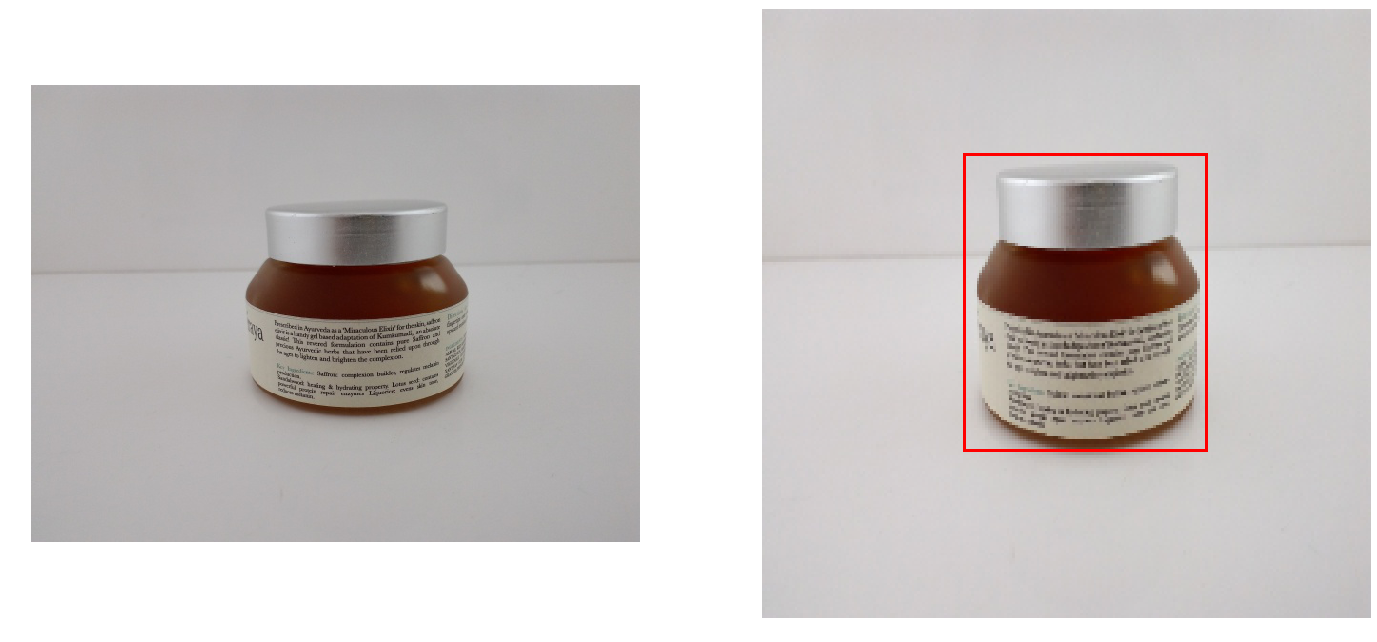

In [31]:
idx  = 9
img  = array_to_img(val_a[idx])
img  = img.convert('RGB')
draw = Draw(img)
draw.rectangle(list(val[idx][1:]), outline='red')
show_object([read_raw_image(val[idx][0]), img], per_row=2)

### Training in regression mode

In [32]:
!python pre_trained_reg.py

Using TensorFlow backend.
All the packages are loaded
building model......
Instructions for updating:
Colocations handled automatically by placer.
2019-03-14 15:30:57.693955: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-14 15:30:57.694270: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x238f1e0 executing computations on platform Host. Devices:
2019-03-14 15:30:57.694311: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-14 15:30:57.798914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-14 15:30:57.799530: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x238fce0 executing computations on platform CUDA. Devices:
2019-03-14 15:30:57.799575: I tensorflow/compiler/xla/service/service.cc:158]   Stream

In [0]:
train = pd.read_csv('regression.csv')

In [35]:
train['x1']=train['x1']*(224/640)
train['x2']=train['x2']*(224/640)

train['y1']=train['y1']*(224/480)
train['y2']=train['y2']*(224/480)
val=train[['image_name', 'x1', 'y1', 'x2','y2']].values
img_shape=(224,224,3)
def show_object(imgs, per_row=5):
    n         = len(imgs)
    rows      = (n + per_row - 1)//per_row
    cols      = min(per_row, n)
    fig, axes = plt.subplots(rows,cols, figsize=(24//per_row*cols,24//per_row*rows))
    for ax in axes.flatten(): ax.axis('off')
    for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): ax.imshow(img.convert('RGB'))

val_a = np.zeros((len(val),)+img_shape,dtype=K.floatx()) # Preprocess validation images 
val_b = np.zeros((len(val),4),dtype=K.floatx()) # Preprocess bounding boxes
for i,j in enumerate(tqdm_notebook(val)):
    img  = read_for_validation(j[0])
    val_a[i,:,:,:] = img
val_b=val[:,1:] 

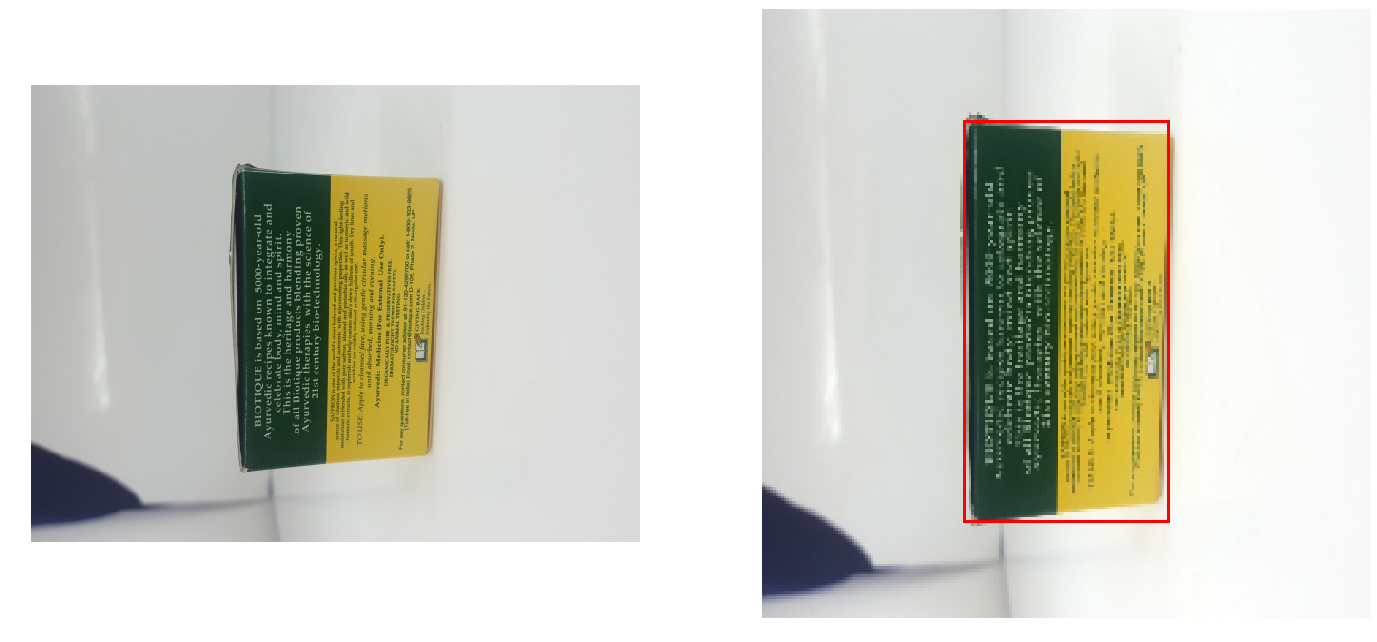

In [38]:
idx  = 2
img  = array_to_img(val_a[idx])
img  = img.convert('RGB')
draw = Draw(img)
draw.rectangle(list(val_b[idx]), outline='red')
show_object([read_raw_image(val[idx][0]), img], per_row=2)

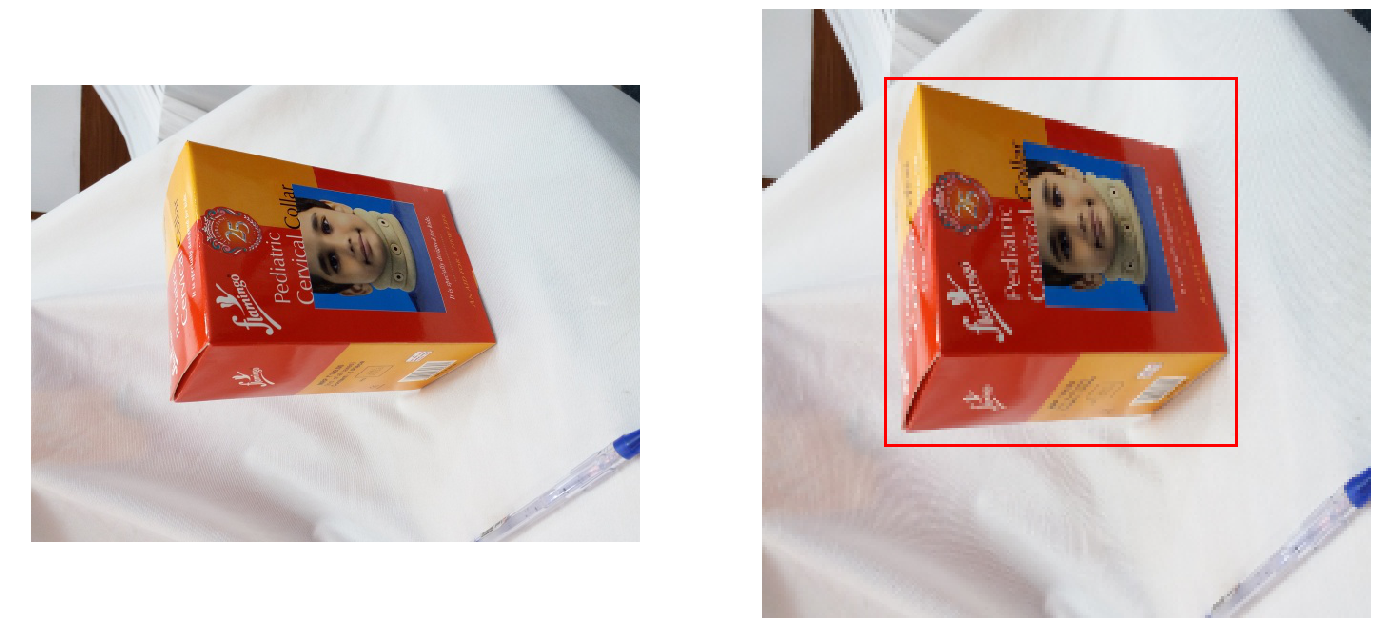

In [39]:
idx  = 10
img  = array_to_img(val_a[idx])
img  = img.convert('RGB')
draw = Draw(img)
draw.rectangle(list(val_b[idx]), outline='red')
show_object([read_raw_image(val[idx][0]), img], per_row=2)